In [1]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('main.csv')



In [4]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1


<Axes: xlabel='category'>

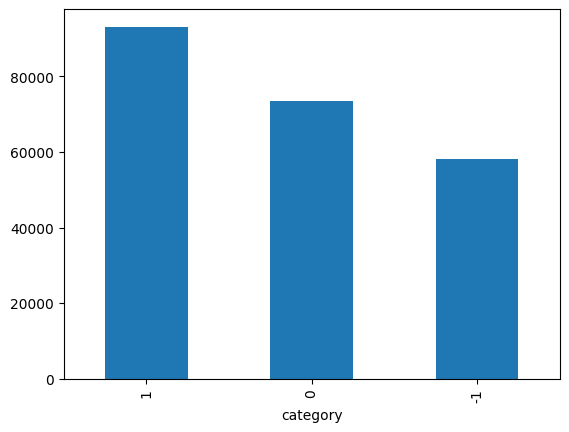

In [5]:
df['category'].value_counts().plot(kind = 'bar')

In [6]:
df.shape

(224660, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224660 entries, 0 to 224659
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  224089 non-null  object
 1   category    224660 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [8]:
df.isnull().sum()

clean_text    571
category        0
dtype: int64

In [9]:
df.dropna(inplace= True)

In [10]:
def convert_lower(text):
    return text.lower()


In [11]:
df['clean_text'].apply(convert_lower)

0         when modi promised “minimum government maximum...
1         talk all the nonsense and continue all the dra...
2         what did just say vote for modi  welcome bjp t...
3         asking his supporters prefix chowkidar their n...
4         answer who among these the most powerful world...
                                ...                        
224655    just realized that the windows partition of my...
224656    just realized that my mac window partition is ...
224657    just realized the windows partition of my mac ...
224658    just realized between the windows partition of...
224659    just like the windows partition of my mac is l...
Name: clean_text, Length: 224089, dtype: object

In [12]:
import re

def remove_special(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)


In [13]:

df['clean_text'].apply(remove_special)

0         when modi promised minimum government maximum ...
1         talk all the nonsense and continue all the dra...
2         what did just say vote for modi  welcome bjp t...
3         asking his supporters prefix chowkidar their n...
4         answer who among these the most powerful world...
                                ...                        
224655    Just realized that the Windows partition of my...
224656    Just realized that my Mac window partition is ...
224657    Just realized the windows partition of my Mac ...
224658    Just realized between the windows partition of...
224659    Just like the windows partition of my Mac is l...
Name: clean_text, Length: 224089, dtype: object

In [14]:
def remove_stopwords(text):
    x=[]
    for i in text.split():

        if i not in stopwords.words('english'):
            x.append(i)
    y=x[:]
    x.clear()
    return y

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
df['clean_text'].apply(remove_stopwords)

0         [modi, promised, “minimum, government, maximum...
1             [talk, nonsense, continue, drama, vote, modi]
2         [say, vote, modi, welcome, bjp, told, rahul, m...
3         [asking, supporters, prefix, chowkidar, names,...
4         [answer, among, powerful, world, leader, today...
                                ...                        
224655    [Just, realized, Windows, partition, Mac, like...
224656    [Just, realized, Mac, window, partition, 6, ye...
224657    [Just, realized, windows, partition, Mac, 6, y...
224658    [Just, realized, windows, partition, Mac, like...
224659    [Just, like, windows, partition, Mac, like, 6,...
Name: clean_text, Length: 224089, dtype: object

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [18]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def stem_words(text):
    ps = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_words = [ps.stem(word) for word in tokens]
    return stemmed_words

In [19]:
df['clean_text'] = df['clean_text'].apply(stem_words)

In [20]:
df

,clean_text,category
0,"[when, modi, promis, “, minimum, govern, maxim...",-1
1,"[talk, all, the, nonsens, and, continu, all, t...",0
2,"[what, did, just, say, vote, for, modi, welcom...",1
3,"[ask, hi, support, prefix, chowkidar, their, n...",1
4,"[answer, who, among, these, the, most, power, ...",1
...,...,...
224655,"[just, realiz, that, the, window, partit, of, ...",1
224656,"[just, realiz, that, my, mac, window, partit, ...",1
224657,"[just, realiz, the, window, partit, of, my, ma...",1
224658,"[just, realiz, between, the, window, partit, o...",1


In [21]:
df['category'] = df['category'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224089 entries, 0 to 224659
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  224089 non-null  object
 1   category    224089 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 4.3+ MB


In [23]:
def join_back(list_input):
    return " ".join(list_input)

In [24]:
df['clean_text'] = df['clean_text'].apply(join_back)

In [25]:
df

,clean_text,category
0,when modi promis “ minimum govern maximum gove...,-1
1,talk all the nonsens and continu all the drama...,0
2,what did just say vote for modi welcom bjp tol...,1
3,ask hi support prefix chowkidar their name mod...,1
4,answer who among these the most power world le...,1
...,...,...
224655,just realiz that the window partit of my mac i...,1
224656,just realiz that my mac window partit is 6 yea...,1
224657,just realiz the window partit of my mac is now...,1
224658,just realiz between the window partit of my ma...,1


In [26]:
X = df['clean_text']
Y = df['category']

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=8500)

In [28]:
X = cv.fit_transform(df['clean_text']).toarray()


MemoryError: Unable to allocate 14.2 GiB for an array with shape (224089, 8500) and data type int64

In [ ]:
X.shape

(69996, 8500)

In [ ]:
X[0].mean()

0.0032941176470588237

In [ ]:
Y.shape

(69996,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.2, random_state = 42)

In [ ]:
x_train.shape

(55996, 8500)

In [ ]:
x_test.shape

(14000, 8500)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB


In [ ]:

clf1 = GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()

In [ ]:
clf1.fit(x_train,y_train)

GaussianNB()

In [ ]:
clf2.fit(x_train,y_train)

MultinomialNB()

In [ ]:
clf3.fit(x_train,y_train)

In [ ]:
y_pred1=clf1.predict(x_test)
y_pred2=clf2.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
print("Gaussian",accuracy_score(y_test,y_pred1))
print("Multinomial",accuracy_score(y_test,y_pred2))
#print("Bernaulli",accuracy_score(y_test,y_pred3))

Gaussian 0.4764285714285714
Multinomial 0.7367857142857143
